# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
sns.set()
%matplotlib inline

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

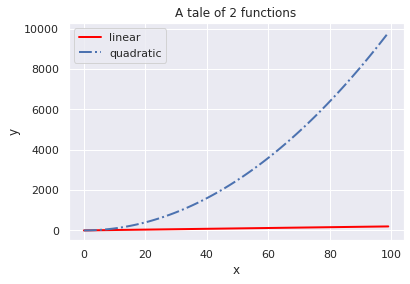

In [3]:
plt.plot(x, y, label='linear', linewidth = 2, ls = '-', color = 'red')
plt.plot(x, z, label='quadratic', linewidth = 2, ls = '-.')  

plt.xlabel('x')
plt.ylabel('y')

plt.title("A tale of 2 functions")
plt.legend()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

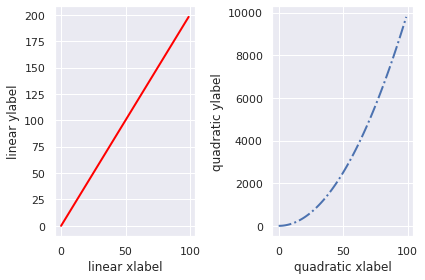

In [4]:
fig, axs = plt.subplots(1, 2)

axs[0].plot(x, y, label='linear', linewidth = 2, ls = '-', color = 'red')
axs[1].plot(x, z, label='quadratic', linewidth = 2, ls = '-.')

axs[0].set_xlabel('linear xlabel')
axs[1].set_xlabel('quadratic xlabel')
axs[0].set_ylabel('linear ylabel')
axs[1].set_ylabel('quadratic ylabel')

plt.tight_layout() # Or "fig.tight_layout()"

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

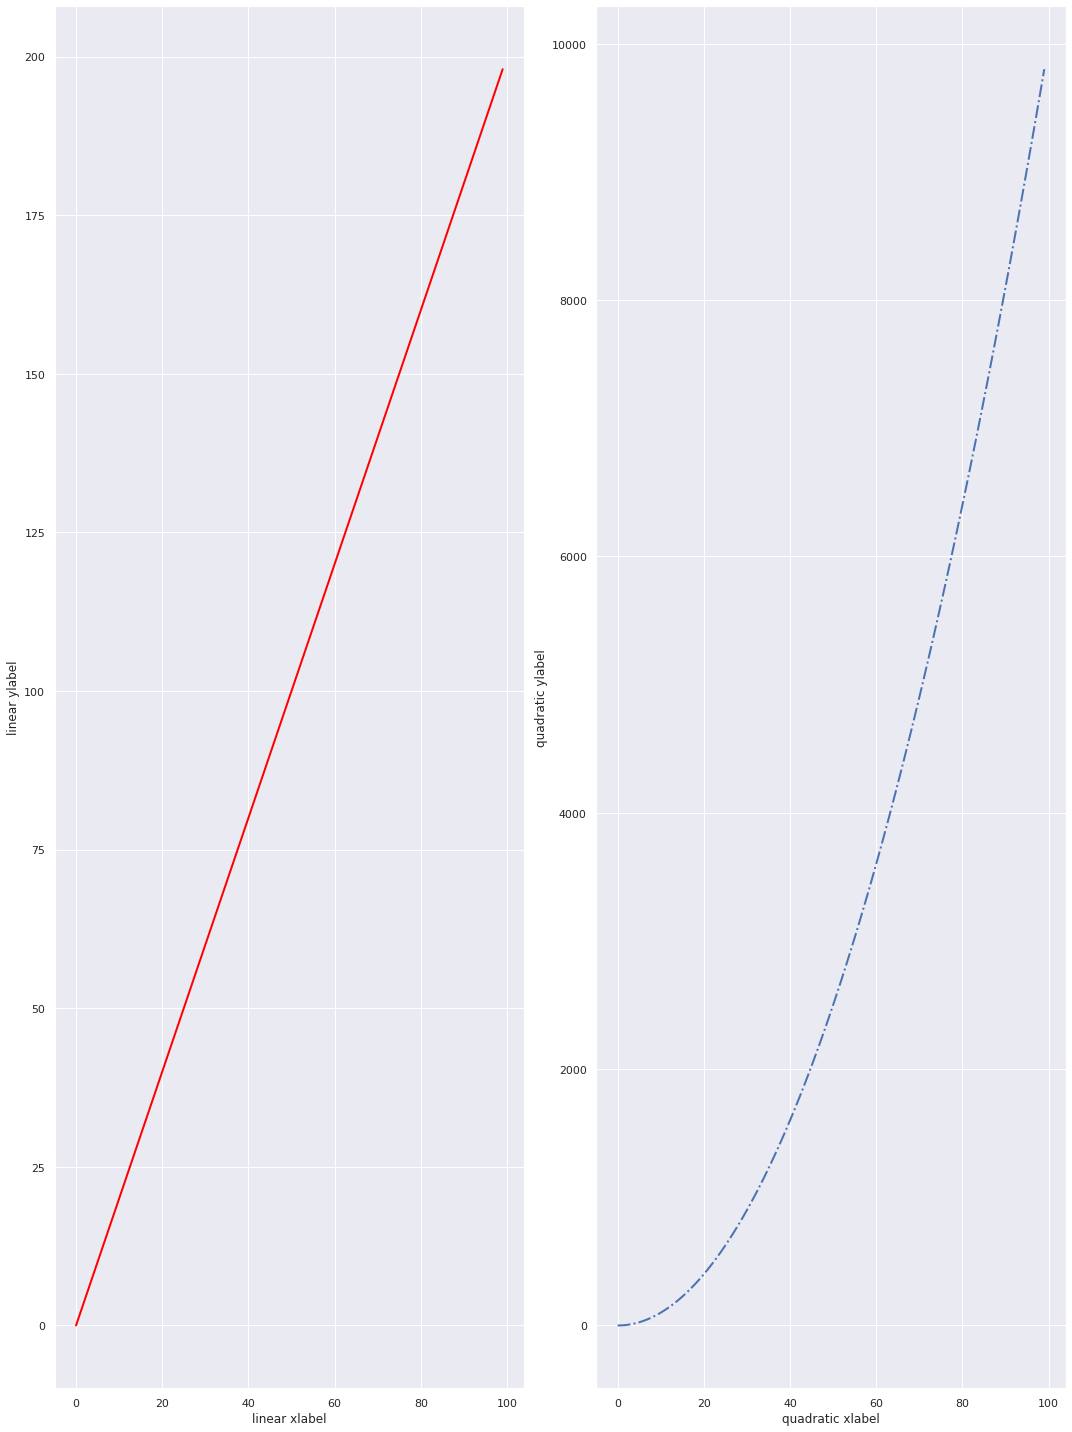

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(15,20))

axs[0].plot(x, y, label='linear', linewidth = 2, ls = '-', color = 'red')
axs[1].plot(x, z, label='quadratic', linewidth = 2, ls = '-.')

axs[0].set_xlabel('linear xlabel')
axs[1].set_xlabel('quadratic xlabel')
axs[0].set_ylabel('linear ylabel')
axs[1].set_ylabel('quadratic ylabel')

plt.tight_layout() # Or "fig.tight_layout()"

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

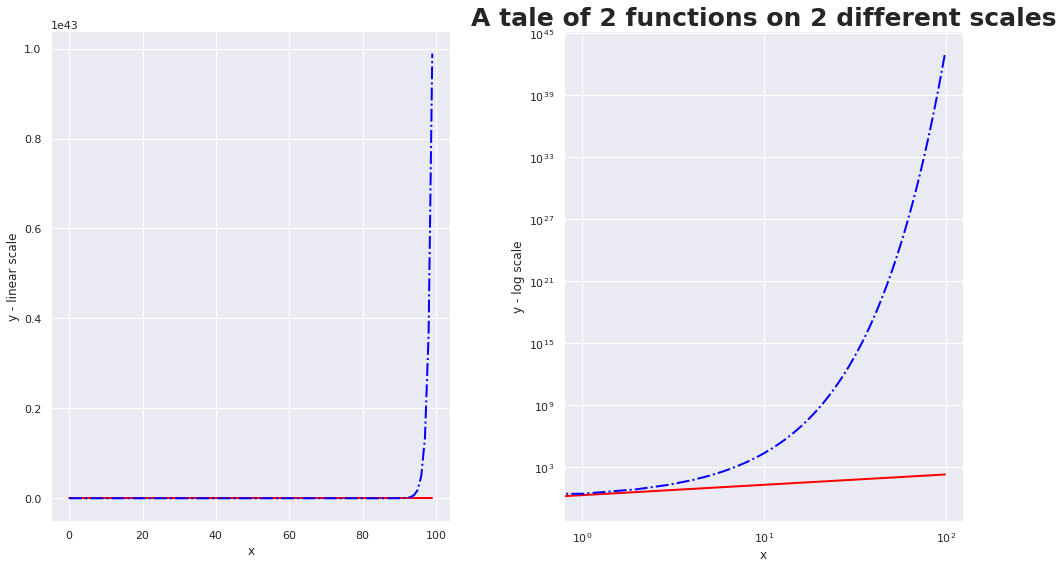

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(15,8))

axs[0].plot(x, y, label='X**2', linewidth = 2, ls = '-', color = 'red')
axs[0].plot(x, np.exp(x) , label='e**x', lw = 2, ls = '-.', color = 'blue') 
axs[0].set_xlabel('x')
axs[0].set_ylabel('y - linear scale')


axs[1].plot(x, y, label='x**2', linewidth = 2, ls = '-', color = 'red')
axs[1].plot(x, np.exp(x) , label='e**x', lw = 2, ls = '-.', color = 'blue') 
axs[1].set_xlabel('x')
axs[1].set_ylabel('y - log scale')

axs[1].set_xscale('log')
axs[1].set_yscale('log')



plt.title('A tale of 2 functions on 2 different scales', fontsize=25, fontweight = 'bold', loc = 'center')

fig.tight_layout() # Or "fig.tight_layout()"
plt.show()


#### As a bonus challenge, try to add a legend to the plot.

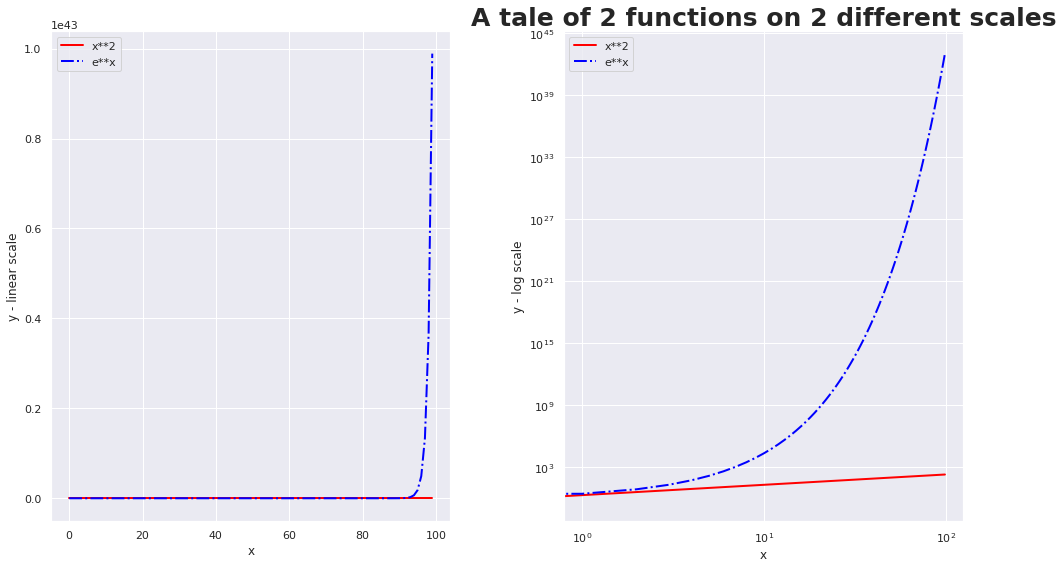

In [7]:
# your code here

fig, axs = plt.subplots(1, 2, figsize=(15,8))

axs[0].plot(x, y, label='x**2', linewidth = 2, ls = '-', color = 'red')
axs[0].plot(x, np.exp(x) , label='e**x', lw = 2, ls = '-.', color = 'blue') 
axs[0].set_xlabel('x')
axs[0].set_ylabel('y - linear scale')
axs[0].legend()

axs[1].plot(x, y, label='x**2', linewidth = 2, ls = '-', color = 'red')
axs[1].plot(x, np.exp(x) , label='e**x', lw = 2, ls = '-.', color = 'blue') 
axs[1].set_xlabel('x')
axs[1].set_ylabel('y - log scale')
axs[1].legend()

axs[1].set_xscale('log')
axs[1].set_yscale('log')



plt.title('A tale of 2 functions on 2 different scales', fontsize=25, fontweight = 'bold', loc = 'center')

fig.tight_layout() # Or "fig.tight_layout()"
plt.show()

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [8]:
# your code here
fb = pd.read_csv('Fitbit2.csv')

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

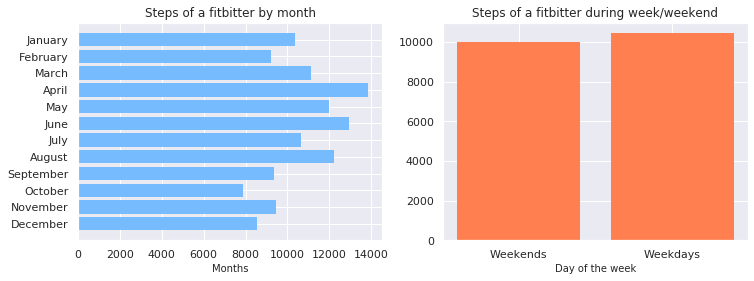

In [9]:
## define working vars
months = fb.groupby('Months_encoded').median() [['Steps']]
weeks = fb.groupby(['Work_or_Weekend']).median() [['Steps']]


## pretty labels because of my OCD
months.index = months.index.map({k: calendar.month_name[k] for k in range(1,13)})
months = months.iloc[::-1]

## init axs
fig, axs = plt.subplots(1, 2, figsize=(12, 4))


# Bar horizontal on months because it's more comprehensible
plt.sca(axs[0])
plt.barh(months.index, months.Steps, label='Month', color = 'xkcd:sky blue', linewidth = 0)
plt.yticks(range(0,13))
plt.xlabel('Months',fontsize=10)
plt.title('Steps of a fitbitter by month')

# MEDIAN STEPS BY WORK_OR_WEEKEND
plt.sca(axs[1])
plt.bar(weeks.index, weeks['Steps'], label='Month/Weekend', color = 'coral', linewidth = 0)
plt.xlabel('Day of the week',fontsize=10)
plt.xticks(weeks.index, ('Weekends', 'Weekdays'))

plt.title('Steps of a fitbitter during week/weekend')

#os.mkdir('../figures')
plt.savefig('../figures/Steps.pdf', format = 'pdf')

**Write a loop to plot 3 scatter plots of the following features:**

+ Minutes Lightly Active vs Steps
+ Minutes Very Active vs Steps
+ Minutes Sedentary vs Steps

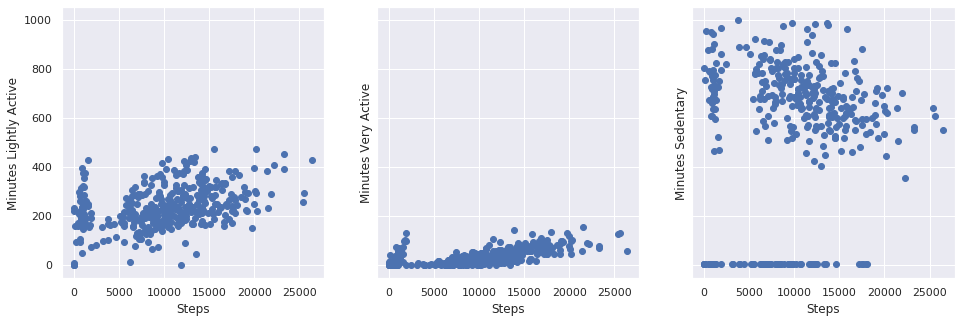

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(16, 5), sharey = 'row')
columns = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']

for ax,c in zip(axs,columns):
    plt.sca(ax)
    plt.scatter(fb['Steps'], fb[c])
    plt.xlabel('Steps')
    plt.ylabel(c)

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [11]:
titanic = pd.read_csv('titanic.csv')
## the titanic dataset has been used too many times by data analytics students. We claim the right to have new and more interesting datasets
## i have nothing new to say about titanic except that Rose had space for Jack

![image](https://www.scienceabc.com/wp-content/uploads/2016/04/rose-and-jack-on-raft-ImgurThemetapicture.com_.jpg "Rose was an a**hole")

#### Explore the titanic dataset using Pandas dtypes.

In [12]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [13]:
# NUMERICAL VARIABLES
titanic.select_dtypes(include = ['int', 'float64'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [14]:
# CATEGORICAL VARIABLES
titanic.select_dtypes(include = ['object'])

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

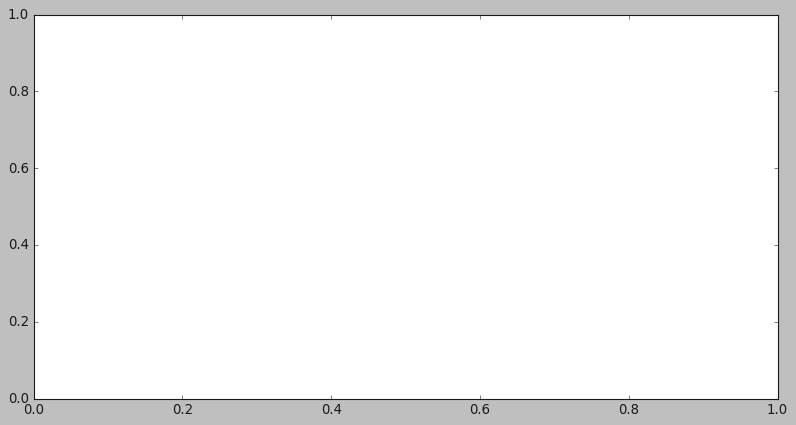

In [15]:
plt.style.use('classic')
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

#### Use the right visulalization to show the distribution of column `Age`.

Text(0, 0.5, 'No of Passengers')

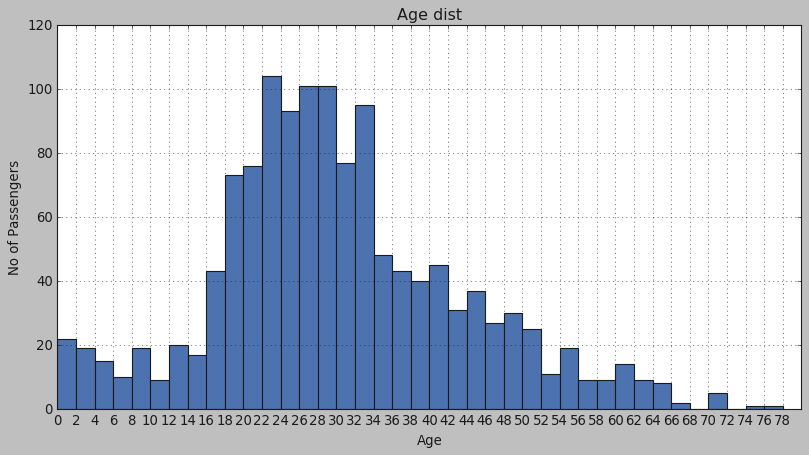

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax = titanic['Age'].hist(bins=np.arange(0,80,2))
ax.set_xticks(np.arange(0,80,2))
ax.set_title('Age dist')
ax.set_xlabel('Age')
ax.set_ylabel('No of Passengers')

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

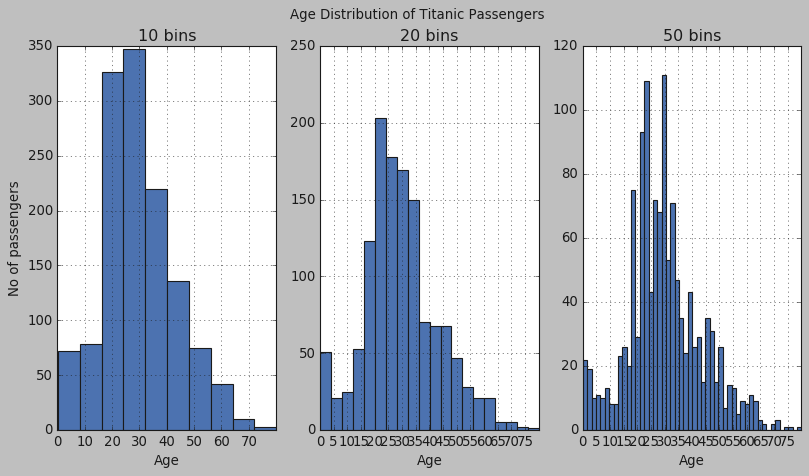

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6))
bins = [10, 20, 50]
ticks = [np.arange(0,80,10), np.arange(0,80,5),np.arange(0,80,5)]

axs[0].set_ylabel('No of passengers')

for ax, b, t in zip(axs,bins, ticks): 
    plt.sca(ax)
    titanic['Age'].hist(bins = b)
    ax.set_xlabel('Age')
    ax.set_xticks(t)
    ax.set_title('%d bins' % b)

title = plt.suptitle('Age Distribution of Titanic Passengers')

#### How does the bin size affect your plot?

In [18]:
"""
when bin size is higher(less bins) we have less granular information. the y scale is bigger (max y is higher)

"""

'\nwhen bin size is higher(less bins) we have less granular information. the y scale is bigger (max y is higher)\n\n'

#### Use seaborn to show the distribution of column `Age`.

Text(0, 0.5, 'No of passengers')

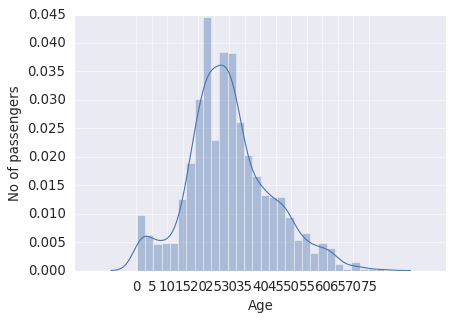

In [19]:
# your code here
sns.set_style('darkgrid')

fig, ax = plt.subplots (1,1,figsize=(6, 4))

sns.distplot(titanic['Age'])

ax.set_xticks(np.arange(0,80,5))
ax.set_xlabel('Age')
ax.set_ylabel('No of passengers')

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

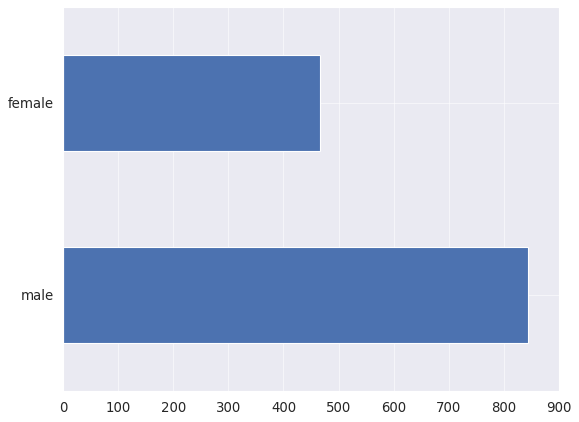

In [20]:
# Method 1 - matplotlib
titanic['Gender'].value_counts().plot(kind='barh')

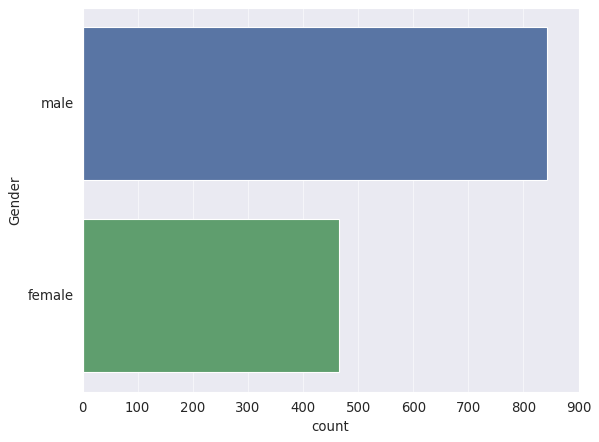

In [21]:
ax = sns.countplot(y="Gender", data=titanic)

#### Use the right plot to visualize the column `Pclass`.

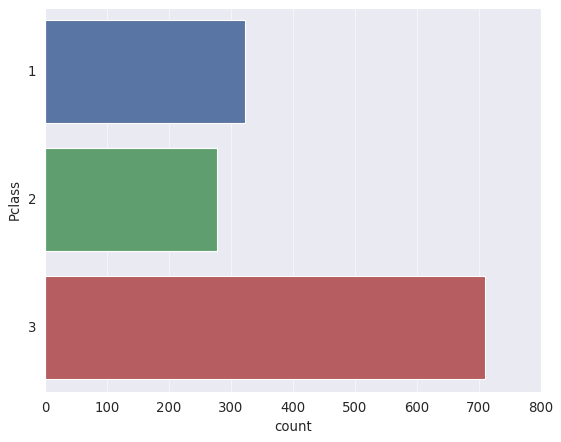

In [22]:
# right plot is highly subjective, could be just a pie plot
ax = sns.countplot(y="Pclass", data=titanic)

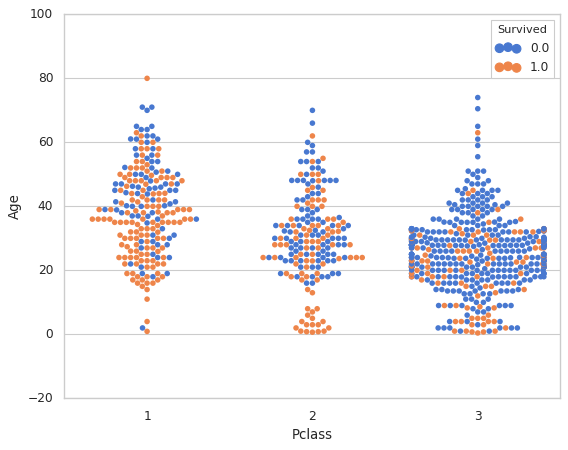

In [23]:
sns.set(style="whitegrid", palette="muted")

sns.swarmplot(x="Pclass", y="Age", hue="Survived", data=titanic)

## I like this one, shows: a) that money can't buy you happiness, but it can buy your life in a crisis
## b) old people don't do well in cold waters

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

In [24]:
### A TABLE!
titanic.Age.describe().to_frame()

##just kidding. will do a violin plot because i don't like boxplots

,Age
count,1309.000000
mean,29.879186
std,13.448335
min,0.170000
25%,22.000000
50%,28.500000
75%,37.000000
max,80.000000


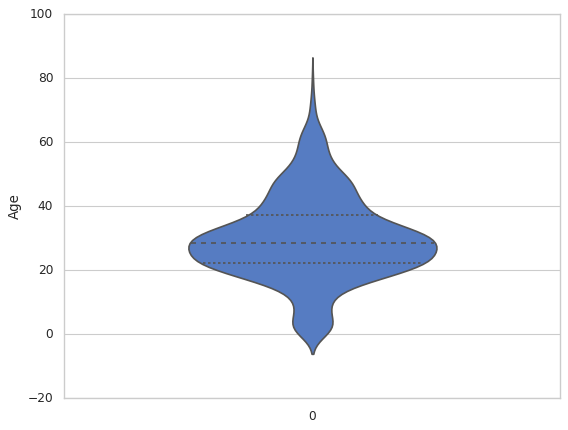

In [25]:
ax = sns.violinplot(data=titanic.Age, palette='muted', inner = 'quartile', width = 0.5, saturation= 0.8)#, dodge = False)


ax.set(ylabel='Age')
plt.show()

In [26]:
"""
your comments here
"""

'\nyour comments here\n'

#### What does the last plot tell you about the feature `Age`?

In [27]:
"""
IQR < 20 years
slight positive skew distribution of age.
quartile shown
"""

'\nIQR < 20 years\nslight positive skew distribution of age.\nquartile shown\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

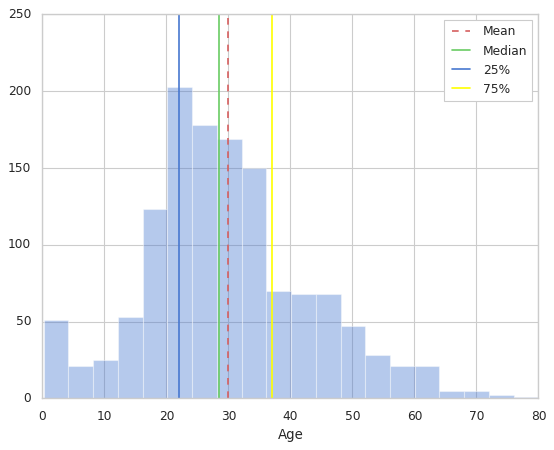

In [28]:
# your code here
ax = sns.distplot(titanic.Age, bins=20, kde = False)


mean = titanic.Age.mean()
median = titanic.Age.median()
q1 = titanic.Age.describe()[4]
q3 = titanic.Age.describe()[6]

ax.axvline(mean, color='r', linestyle='--')
ax.axvline(median, color='g', linestyle='-')
ax.axvline(q1, color='b', linestyle='-')
ax.axvline(q3, color='yellow', linestyle='-')


plt.legend({'Mean':mean,'Median':median, '25%': q1, '75%': q3})


#### What additional information does the last plot provide about feature `Age`?

In [29]:
"""
both provide same info
"""

'\nboth provide same info\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

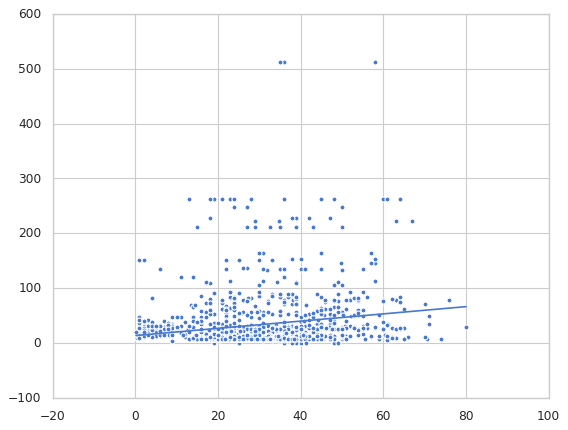

In [30]:
# Method 1 - matplotlib
# your code here

from scipy.stats import linregress as lm
gradient, intercept, r_value, p_value, std_err = lm(titanic.Age, titanic.Fare)
x1=np.linspace(titanic.Age.min(),titanic.Age.max(), 500, endpoint=True)
y1=gradient*x1+intercept
plt.plot(x1,y1)
plt.scatter(titanic.Age, titanic.Fare)
plt.show()

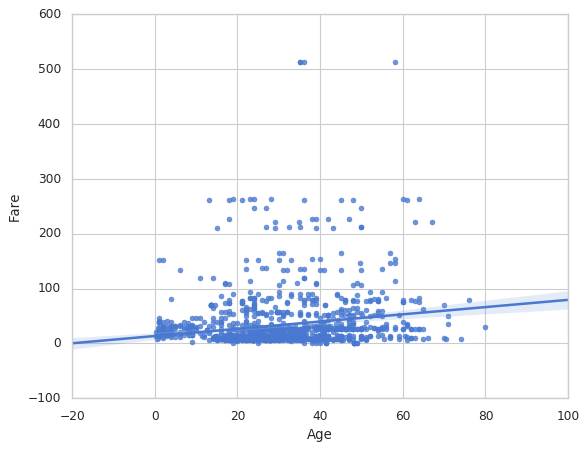

In [31]:
# Method 2 - seaborn
sns.regplot(x="Age", y="Fare", data=titanic)

#### Plot the correlation matrix using seaborn.

In [32]:
# your code here

corr = titanic.iloc[1:,1:].corr()

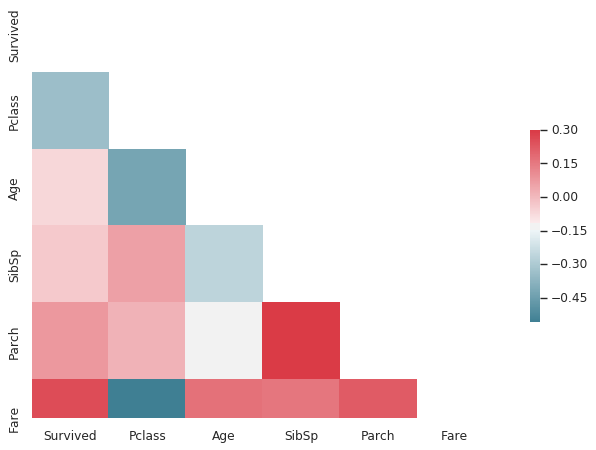

In [33]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, square=True, linewidths=0, cbar_kws={"shrink": .5})

#### What are the most correlated features?

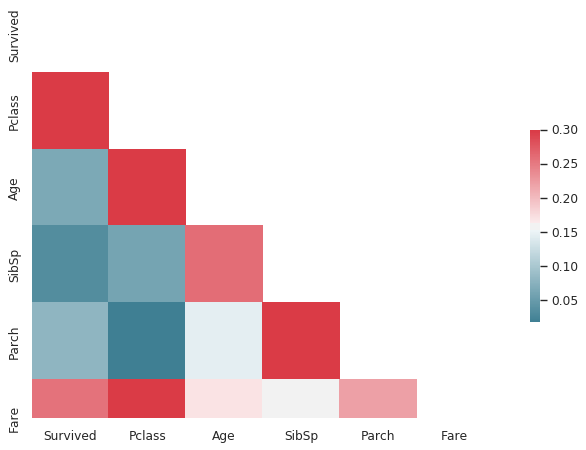

In [34]:
"""
the ones in darker colors...
pclass and fare
pclass and survived
pclass and age
survived and fare
Parch and SibSp

so high correlation between fare and the ticket class.
same for class and survivability - money buys your life
same for parents on the boat and siblings on the boat. families travelling together.
class correlated with age, older people travelled on 1st class more

did plot on absolute values so it is more clear
"""
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(abs(corr), mask=mask, cmap=cmap, vmax=.3, square=True, linewidths=0, cbar_kws={"shrink": .5})

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

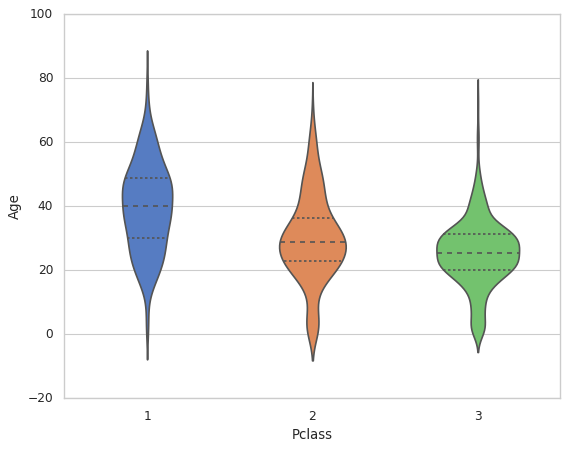

In [35]:
ax = sns.violinplot(x=titanic.Pclass, y = titanic.Age, palette='muted', inner = 'quartile', width = 0.5, saturation= 0.8)#, dodge = False)


ax.set(ylabel='Age')
plt.show()

## violin plots ftw

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

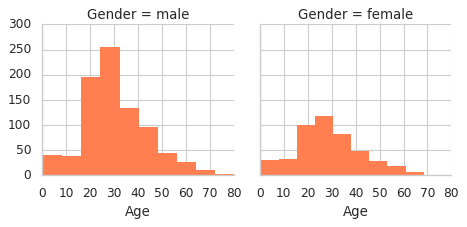

In [36]:
# your code here
# your code here
sns.set(style="whitegrid", palette="muted")

sns.FacetGrid(titanic, col="Gender").map(plt.hist, "Age", lw = 0, color = 'coral')

#g = g.map(plt.hist, "Age")

In [37]:
## Matplotlib and seaborn are both amazing and I won't choose between one or another ;D